# **Data Visualization Assignment**
### **Data Analytics Course - Implementation Notebook**

## 📌 **Objective**
This notebook implements various **data visualization techniques** to analyze three given datasets:
- **bar_assignment.csv** (for a horizontal stacked bar chart)
- **sankey_assignment.csv** (for a Sankey diagram)
- **networks_assignment.csv** (for a network graph)

The primary objective is to accurately represent the data using prescribed visualization formats while maintaining clarity and consistency in design.

## 🔹 **Workflow Overview**
1. **Load the datasets** and preprocess the data.
2. **Generate visualizations** following given specifications:
   - **Bar Chart:** Transform `1` into "Yes" and `0` into "No" and create a horizontal stacked bar chart.
   - **Sankey Diagram:** Connect specified categories and follow given path specifications.
   - **Network Graph:** Construct a graph with a pentagram structure for key nodes and appropriate color coding for other nodes.
3. **Collate all visualizations** into a single composite image suitable for printing.

The implementation will ensure that the same font and font size are maintained across all visualizations for consistency.

---

## Bar Graph Analysis

### Introduction
This section focuses on creating a **horizontal stacked bar chart** using the given dataset. We will:
- Convert `1` into "Yes" and `0` into "No".
- Group the data by labels and count occurrences of "Yes" and "No".
- Visualize the results following the specified format and color scheme.

---



## Step 1: Load the Dataset
### 📌 **Loading the Dataset**
The first step in this process is to read the dataset into a pandas DataFrame.
We will check the structure of the dataset to understand how the values are represented.


In [1]:
import pandas as pd
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# List files in the directory to verify presence of 'bar_assignment.csv'
print("Files in Directory:", os.listdir())

# Load the dataset
file_path = "bar_assignment.csv"
df = None  # Define df beforehand to avoid NameError

# Try loading the file
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(df.head())  # Display first few rows
except FileNotFoundError:
    print("Error: File not found. Check the file path and ensure it's in the correct directory.")

# Check if df is successfully loaded
if df is None:
    print("DataFrame is not loaded. Please check the file path.")


Current Working Directory: c:\Users\Shawn\OneDrive\Desktop\Programming\DataAnalytics_Activities\Assignment_2
Files in Directory: ['assignment_2.ipynb', 'bar_assignment.csv', 'networks_assignment.csv', 'sankey_assignment.csv']
File loaded successfully!
  LABEL  COUNT
0     D      1
1     D      1
2     D      0
3     D      1
4     F      1


## Step 2: Transform Data
### 📌 **Processing and Transforming Data**
In this step, we convert the numerical values `1` into "Yes" and `0` into "No".
We will then group the data by labels to count occurrences of each category.


In [2]:
# Convert 1 to 'Yes' and 0 to 'No'
df['Response'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Count occurrences of Yes and No per label
bar_summary = df.groupby("LABEL")['Response'].value_counts().unstack().fillna(0)

# Display transformed data
bar_summary


Response,No,Yes
LABEL,,
D,1.0,3.0
F,2.0,2.0
I,0.0,1.0
N,1.0,2.0
S,5.0,5.0


## Step 3: Generate Horizontal Stacked Bar Chart
### 📌 **Creating the Bar Chart**
Now, we will generate a **horizontal stacked bar chart** using Matplotlib. 


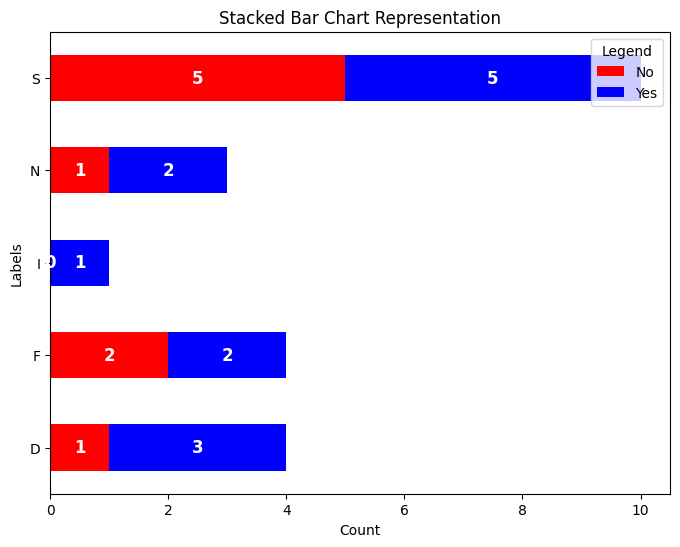

In [3]:
import matplotlib.pyplot as plt

# Define colors for Yes and No
colors = {"No": "red", "Yes": "blue"}

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_summary.plot(kind="barh", stacked=True, color=[colors["No"], colors["Yes"]], ax=ax)

# Add labels and title
ax.set_xlabel("Count")
ax.set_ylabel("Labels")
ax.set_title("Stacked Bar Chart Representation")
ax.legend(["No", "Yes"], title="Legend", loc="upper right")

# Annotate values on bars
for i, (no, yes) in enumerate(zip(bar_summary["No"], bar_summary["Yes"])):
    ax.text(no / 2, i, str(int(no)), va="center", ha="center", color="white", fontsize=12, fontweight="bold")
    ax.text(no + yes / 2, i, str(int(yes)), va="center", ha="center", color="white", fontsize=12, fontweight="bold")

# Show the plot
plt.show()
